# Ant simulation data collection

## Parameters

In [1]:
WIDTH = 500
HEIGHT = 500

parameters = {
    "experiment_1" : {
        "N": 100,
        "width": WIDTH,
        "height": HEIGHT,
        "food_sources": 1,
        "food_source_amount": 25,
        "home_x": 150,
        "home_y": 20,
        "food_source_scenario": "scenario 2",
        "ant_freedom_coefficient": 0.25,
        "ant_direction_noise": 180,
        "create_ants_ratio": 2,
        "ants_life": 1000,
        "go_home_ratio": 0.5
    },
    "experiment_2" : {
        "N": 100,
        "width": WIDTH,
        "height": HEIGHT,
        "food_sources": 1,
        "food_source_amount": 25,
        "home_x": 150,
        "home_y": 20,
        "food_source_scenario": "scenario 2",
        "ant_freedom_coefficient": 0.25,
        "ant_direction_noise": 180,
        "create_ants_ratio": 2,
        "ants_life": 500,
        "go_home_ratio": 0.5
    },
    "experiment_3" : {
        "N": 50,
        "width": WIDTH,
        "height": HEIGHT,
        "food_sources": 1,
        "food_source_amount": 25,
        "home_x": 150,
        "home_y": 20,
        "food_source_scenario": "scenario 2",
        "ant_freedom_coefficient": 0.25,
        "ant_direction_noise": 180,
        "create_ants_ratio": 2,
        "ants_life": 1000,
        "go_home_ratio": 0.5
    },
    "experiment_4" : {
        "N": 100,
        "width": WIDTH,
        "height": HEIGHT,
        "food_sources": 1,
        "food_source_amount": 25,
        "home_x": 150,
        "home_y": 20,
        "food_source_scenario": "scenario 2",
        "ant_freedom_coefficient": 0.25,
        "ant_direction_noise": 180,
        "create_ants_ratio": 2,
        "ants_life": 1000,
        "go_home_ratio": 0.2
    },
    "experiment_5" : {
        "N": 100,
        "width": WIDTH,
        "height": HEIGHT,
        "food_sources": 1,
        "food_source_amount": 17,
        "home_x": 150,
        "home_y": 20,
        "food_source_scenario": "scenario 3",
        "ant_freedom_coefficient": 0.25,
        "ant_direction_noise": 180,
        "create_ants_ratio": 2,
        "ants_life": 1000,
        "go_home_ratio": 0.5
    },
    "experiment_6" : {
        "N": 100,
        "width": WIDTH,
        "height": HEIGHT,
        "food_sources": 1,
        "food_source_amount": 25,
        "home_x": 150,
        "home_y": 20,
        "food_source_scenario": "scenario 2",
        "ant_freedom_coefficient": 0.25,
        "ant_direction_noise": 0,
        "create_ants_ratio": 2,
        "ants_life": 1000,
        "go_home_ratio": 0.5
    },
    "experiment_7" : {
        "N": 100,
        "width": WIDTH,
        "height": HEIGHT,
        "food_sources": 1,
        "food_source_amount": 25,
        "home_x": 150,
        "home_y": 20,
        "food_source_scenario": "scenario 2",
        "ant_freedom_coefficient": 0,
        "ant_direction_noise": 180,
        "create_ants_ratio": 2,
        "ants_life": 1000,
        "go_home_ratio": 0.5
    },
    "experiment_8" : {
        "N": 100,
        "width": WIDTH,
        "height": HEIGHT,
        "food_sources": 1,
        "food_source_amount": 25,
        "home_x": 150,
        "home_y": 20,
        "food_source_scenario": "scenario 2",
        "ant_freedom_coefficient": 0.75,
        "ant_direction_noise": 180,
        "create_ants_ratio": 2,
        "ants_life": 1000,
        "go_home_ratio": 0.5
    }
}

In [2]:
import os

# create data if does not exist
if not os.path.exists("data"):
    os.makedirs("data")

In [11]:
from ants.model.ants_model import AntsModel

def run_experiment(experiment):
    model = AntsModel(**experiment)

    step = 0
    while True:
        print(f"step {step} remaining food and agents: {model.food_in_sources_amount}/{model.food_in_home_amount}, {model.num_agents}", end="\r", flush=True)
        model.step()
        step += 1

        if model.num_agents <= 0:
            break
    
    return model.datacollector.get_model_vars_dataframe()

In [12]:
experiment_1 = run_experiment(parameters["experiment_1"])

experiment_1.to_csv("data/experiment_1.csv")

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# food
# distance
# number of ants

def show_experiment(experiment_path):
    df = pd.read_csv(experiment_path)

    sns.set_theme()
    
    fig, ax = plt.subplots(1, 3, figsize=(25,5))
    # food
    sns.lineplot(data=df["Food in Sources"], color="g", label="Food in Sources", ax=ax[0])
    sns.lineplot(data=df["Food at Home"], color="b", ax=ax[0], label="Food at Home")

    ax[0].set_title("Food")
    ax[0].set_xlabel("steps")
    ax[0].set_ylabel("food_units")

    # distance
    sns.lineplot(data=df["Best Distance"], color="r", ax=ax[1], label="Best Distance")
    sns.lineplot(data=df["Min Distance"], color="b", ax=ax[1], label="Min Distance")

    ax[1].set_title("Distance")
    ax[1].set_xlabel("steps")
    ax[1].set_ylabel("distance_units")

    # number of ants
    ax[2].set_title("Number of ants")
    ax[2].set_xlabel("steps")
    ax[2].set_ylabel("ants_number")
    sns.lineplot(data=df["Number of Ants"], color="g", ax=ax[2], label="Number of Ants")

    fig.show()

C:\Users\luist\AppData\Local\Temp\ipykernel_4688\115878658.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


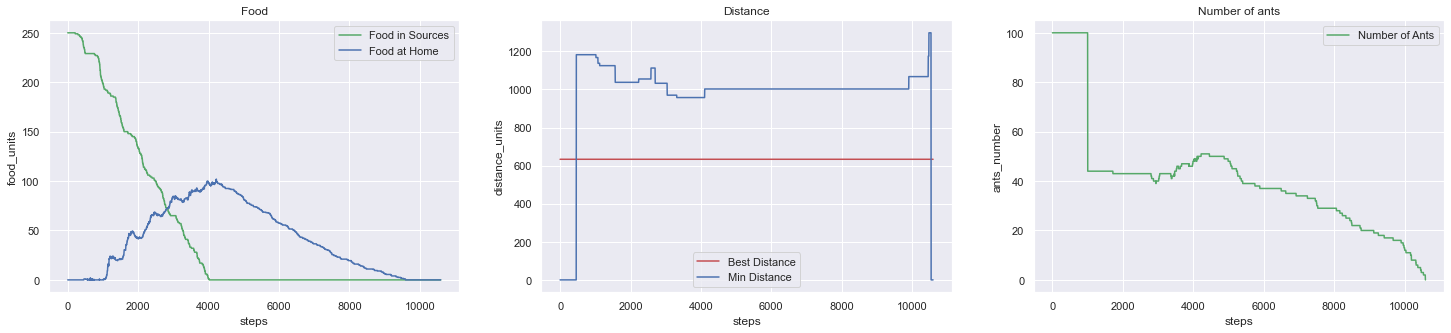

In [55]:
show_experiment("data/experiment_1.csv")

In [ ]:
def run_experiment_with_parameters(experiment_name, parameters):
    experiment = parameters[experiment_name]
    experiment_path = f"data/{experiment_name}.csv"

    if os.path.exists(experiment_path):
        print(f"{experiment_name} already exists")
        return

    print(f"running {experiment_name}")
    df = run_experiment(experiment)
    df.to_csv(experiment_path)

def run_all_experiments():
    for experiment_name in parameters:
        run_experiment_with_parameters(experiment_name, parameters)